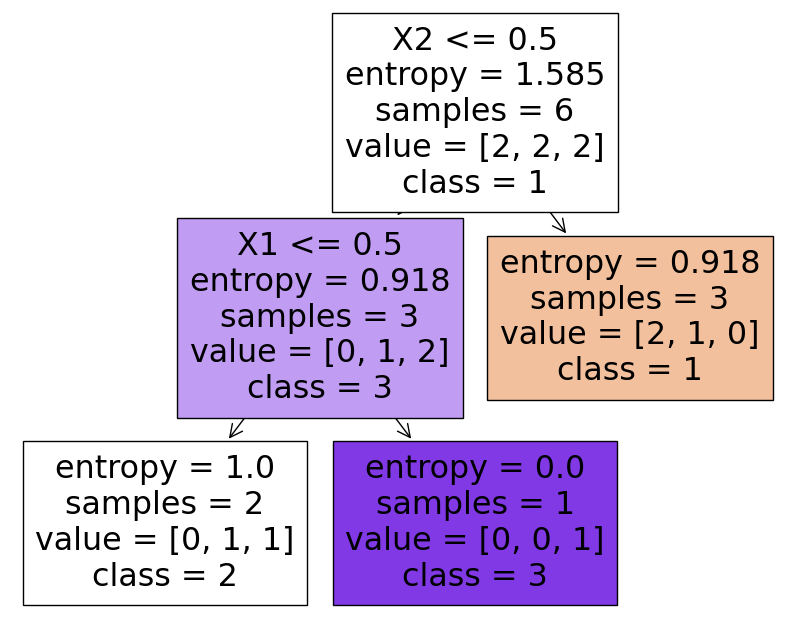

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Define the training data
data = {
    'X1': [1, 1, 1, 1, 0, 0],
    'X2': [1, 1, 1, 0, 0, 0],
    'Y': [1, 1, 2, 3, 2, 3]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Split features and target variable
X = df[['X1', 'X2']]
y = df['Y']

# Create the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['1', '2', '3'])
plt.show()


In [2]:
data_test = {
    'X1': [0],
    'X2': [1],
}

# Create a DataFrame from the data
df_test = pd.DataFrame(data_test)

# Split features and target variable
X_test = df_test[['X1', 'X2']]


y_pred = clf.predict(X_test)

y_pred

array([1], dtype=int64)

In [7]:
clf.feature_importances_

array([0.15876033, 0.84123967])

In [6]:
import numpy as np
from collections import Counter

def entropy(y):
    """Calculate the entropy of a target variable."""
    counts = np.bincount(y)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Add a small epsilon to avoid log(0)
    return entropy

def conditional_entropy(x, y):
    """Calculate the conditional entropy of a feature given a target variable."""
    conditional_entropies = []
    unique_values = np.unique(x)
    for value in unique_values:
        subset_y = y[x == value]
        conditional_entropy = entropy(subset_y) * len(subset_y) / len(y)
        conditional_entropies.append(conditional_entropy)
    return np.sum(conditional_entropies)

def information_gain(x, y):
    """Calculate the information gain for a feature."""
    return entropy(y) - conditional_entropy(x, y)

# Define the training data
X1 = np.array([1, 1, 1, 1, 0, 0])
X2 = np.array([1, 1, 1, 0, 0, 0])
y = np.array([1, 1, 2, 3, 2, 3])

# Calculate information gain for X1 and X2
ig_X1 = information_gain(X1, y)
ig_X2 = information_gain(X2, y)

print("Information Gain for X1:", ig_X1)
print("Information Gain for X2:", ig_X2)


Information Gain for X1: 0.25162916733973284
Information Gain for X2: 0.6666666665223969


In [4]:
from sklearn.feature_selection import mutual_info_classif

# Define the training data
X = np.array([[1, 1], [1, 1], [1, 1], [1, 0], [0, 0], [0, 0]])
y = np.array([1, 1, 2, 3, 2, 3])

# Calculate information gain for X1 and X2 using mutual_info_classif
ig_X1 = mutual_info_classif(X[:, 0].reshape(-1, 1), y)[0]
ig_X2 = mutual_info_classif(X[:, 1].reshape(-1, 1), y)[0]

print("Information Gain for X1:", ig_X1)
print("Information Gain for X2:", ig_X2)

Information Gain for X1: 0
Information Gain for X2: 0.39444444444444443


In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.95, min_df=2,
                                     max_features=100,
                                     stop_words='english')

X_vec = cv.fit_transform(X)

res = dict(zip(cv.get_feature_names(),
               mutual_info_classif(X_vec, y, discrete_features=True)
               ))
print(res)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [8]:
from sklearn.feature_selection import mutual_info_classif

# Define the training data
X = np.array([[1, 1], [1, 1], [1, 1], [1, 0], [0, 0], [0, 0]])
y = np.array([1, 1, 2, 3, 2, 3])

# Calculate mutual information for each feature
mutual_info = mutual_info_classif(X, y)

print("Mutual Information for each feature:", mutual_info)

Mutual Information for each feature: [0.15833333 0.72777778]


In [10]:
import math

def entropy(labels):
    entropy=0
    label_counts = Counter(labels)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(labels)
        entropy -= prob_of_label * math.log2(prob_of_label)
    return entropy

def information_gain(starting_labels, split_labels):
    info_gain = entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain -= len(branched_subset) * entropy(branched_subset) / len(starting_labels)
    return info_gain

def split(dataset, column):
    split_data = []
    col_vals = data[column].unique() # This tree generation method only works with discrete values
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    return(split_data)


def find_best_split(dataset):
    best_gain = 0
    best_feature = 0
    features = list(dataset.columns)
    features.remove('class')
    for feature in features:
        split_data = split(dataset, feature)
        split_labels = [dataframe['class'] for dataframe in split_data]
        gain = information_gain(dataset['class'], split_labels)
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    print(best_feature, best_gain)
    return best_feature, best_gain

data = pd.DataFrame(data)

new_data = split(data, find_best_split(data)[0]) # contains a list of dataframes after splitting



ValueError: list.remove(x): x not in list